# Geoenrichment モジュールを使った変数の取得

ArcGIS API for Python バージョン 1.9.1 以降で、arcgis.geoenrichment モジュールを使用して、GeoEnrichment や情報付加（Enrich Layer）ツールに使用できる変数を検出できるようになりました。本サンプルスクリプトでは、ArcGIS Business Analyst Pro で使用できるローカルデータセットを探索し、情報付加（Enrich Layer）ツールを用いて集計処理を行います。

# モジュールのインポートと設定

In [1]:
from arcgis.geoenrichment import get_countries, Country  # geoenrichment imports
from arcgis.gis import GIS
import arcpy

## オフライン データの探索

ArcGIS Business Analyst Pro で利用できるデータセットを探索します。<br/>
gis = GIS("Pro") とすることでオフラインデータセットを検出できるようになります。<br/>
ArcGIS API for Python 1.9.1 で as_df パラメーターが追加され、利用可能なデータセットを Pandas Dataframe で取得できるようになりました。

In [2]:
gis = GIS("Pro")
cntry_df = get_countries(gis, as_df=True)  # as_df パラメーターを使用して Pandas Dataframe で結果を取得
cntry_df

,iso2,iso3,country_name,vintage,country_id,data_source_id
0,JP,JPN,Japan,2020,JPN_EsriJapan_2022,LOCAL;;JPN_EsriJapan_2022
1,US,USA,United States,2021,USA_ESRI_2021,LOCAL;;USA_ESRI_2021


## データセット内の変数を探索

利用可能な変数の一覧を Pandas Dataframe として取得可能です。取得した Dataframe を自由にフィルタリングして、必要な変数のみを抽出することも簡単にできます。

In [3]:
# Country オブジェクトを取得
jp = Country('JPN', gis)
jp

<Country - Japan 2020 ('local')>

In [4]:
# 利用可能な全変数を取得
ev = jp.enrich_variables
ev

,name,alias,data_collection,enrich_name,enrich_field_name
0,ALL_NUM_OFF_H28,2016 総数 従業者規模 事業所数,CensusOfficebyEmployeeSizeEsriJpan,CensusOfficebyEmployeeSizeEsriJpan.ALL_NUM_OFF...,CensusOfficebyEmployeeSizeEsriJpan_ALL_NUM_OFF...
1,ALL_WOR_1_4_OFF_H28,2016 総数 従業者規模 1-4人 事業所数,CensusOfficebyEmployeeSizeEsriJpan,CensusOfficebyEmployeeSizeEsriJpan.ALL_WOR_1_4...,CensusOfficebyEmployeeSizeEsriJpan_ALL_WOR_1_4...
2,ALL_WOR_5_9_OFF_H28,2016 総数 従業者規模 5-9人 事業所数,CensusOfficebyEmployeeSizeEsriJpan,CensusOfficebyEmployeeSizeEsriJpan.ALL_WOR_5_9...,CensusOfficebyEmployeeSizeEsriJpan_ALL_WOR_5_9...
3,ALL_WOR_1_9_OFF_H28,2016 総数 従業者規模 1-9人 事業所数,CensusOfficebyEmployeeSizeEsriJpan,CensusOfficebyEmployeeSizeEsriJpan.ALL_WOR_1_9...,CensusOfficebyEmployeeSizeEsriJpan_ALL_WOR_1_9...
4,ALL_WOR_10_19_OFF_H28,2016 総数 従業者規模 10-19人 事業所数,CensusOfficebyEmployeeSizeEsriJpan,CensusOfficebyEmployeeSizeEsriJpan.ALL_WOR_10_...,CensusOfficebyEmployeeSizeEsriJpan_ALL_WOR_10_...
...,...,...,...,...,...
1888,P0191,2010 一般世帯数(65歳以上世帯員のみ在住) 単独世帯,PresenceofAgeGroupEsriJapan,PresenceofAgeGroupEsriJapan.P0191,PresenceofAgeGroupEsriJapan_P0191
1889,M_STNUM_N_H27,2015 在学者数,SchoolEnrollmentMesh,SchoolEnrollmentMesh.M_STNUM_N_H27,SchoolEnrollmentMesh_M_STNUM_N_H27
1890,M_STNUM_D_H26,2014 生徒・学生数,SchoolEnrollmentMesh,SchoolEnrollmentMesh.M_STNUM_D_H26,SchoolEnrollmentMesh_M_STNUM_D_H26
1891,M_STNUM_N_H22,2010 在学者数,SchoolEnrollmentMesh,SchoolEnrollmentMesh.M_STNUM_N_H22,SchoolEnrollmentMesh_M_STNUM_N_H22


### 必要な変数のみをフィルタリング

In [5]:
# この例では以下の条件でフィルタリングしています
kv = ev[
    (ev.alias.str.startswith(u'2015')  # 2015 からエイリアス名が始まる
    & ev.alias.str.contains(u"人口総数") # かつ人口総数を含む
    & ev.data_collection.str.contains("Totals")) # かつ DataCollection に Totals を含む
].reset_index(drop=True)
kv

,name,alias,data_collection,enrich_name,enrich_field_name
0,D0001,2015 人口総数,PopulationTotalsEsriJapan,PopulationTotalsEsriJapan.D0001,PopulationTotalsEsriJapan_D0001
1,POPGRW_DF20,2015-2020 人口総数 増減率 (%),PopulationTotalsEsriJapan,PopulationTotalsEsriJapan.POPGRW_DF20,PopulationTotalsEsriJapan_POPGRW_DF20
2,POPGRW_DF25,2015-2025 人口総数 増減率 (%),PopulationTotalsEsriJapan,PopulationTotalsEsriJapan.POPGRW_DF25,PopulationTotalsEsriJapan_POPGRW_DF25
3,POPGRW_DF30,2015-2030 人口総数 増減率 (%),PopulationTotalsEsriJapan,PopulationTotalsEsriJapan.POPGRW_DF30,PopulationTotalsEsriJapan_POPGRW_DF30


## 情報付加対象のポリゴンを生成

情報付加対象のポリゴンを生成します。今回は ArcGIS Online 上の優良コンテンツを集めた ArcGIS Living Atlas of the World (https://livingatlas.arcgis.com/ja/) から<br/>
都道府県庁を取得し、その周辺に 5km 圏を生成します。<br/>
https://www.arcgis.com/home/item.html?id=4d1349c0f93a4844b4b9f725bf101181

<Item title:"都道府県庁所在地" type:Feature Layer Collection owner:Esri_JP_Content>
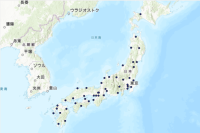

In [6]:
from arcgis.gis import Item
item = Item(gis=gis, itemid = u'4d1349c0f93a4844b4b9f725bf101181')
# itemid はアイテム詳細ページの id= 以下の id を指します
item

都道府県庁所在地から 5km のリング商圏を作成

In [7]:
# Business Analyst エクステンションのチェックアウト
if (arcpy.CheckExtension("BusinessPrem") == "Available"):
    arcpy.CheckOutExtension = "BusinessPrem"
    print(u"Business Analyst エクステンションのチェックアウト完了")
else:
    print(u"Business Analyst エクステンションのライセンスを取得できません。")

Business Analyst エクステンションのチェックアウト完了


In [8]:
# item から一つ目のレイヤーの service URL を取得
serviceURL = item.layers[0].url
ring_ta = r"memory\tmp5kmRings"
# リング商圏の生成ツールを実行
# https://pro.arcgis.com/ja/pro-app/latest/tool-reference/business-analyst/generate-trade-area-rings.htm
arcpy.ba.GenerateTradeAreaRings(in_features=serviceURL,          # 入力データとして都道府県庁所在地の Service URL を使用
                                out_feature_class=ring_ta,       # memory ワークスペースに出力（上書き不可）
                                radii=[5],                       # 半径 5km
                                units="KILOMETERS")

<Result 'memory\\tmp5kmRings'>

## 情報付加 (Enrich Layer) を実行

In [9]:
enrich_fc = arcpy.ba.EnrichLayer(
    in_features=ring_ta,                     # 入力データとして都道府県庁所在地からの 5km リング商圏を使用
    out_feature_class=r'memory\ring_enrich',  # memory ワークスペースに出力（上書き不可）
    variables=list(kv.enrich_name)         # Series から List 作成
)[0]                                       # result オブジェクトから最初のアイテムを取得

enrich_fc

'memory\\ring_enrich'

## Dataframe に変換して出力結果のクリーンアップ

memory ワークスペースに出力したフィーチャクラスを Pandas Dataframe に出力して、スキーマの調整を行います。

In [10]:
from arcgis.features import GeoAccessor
enrich_df = GeoAccessor.from_featureclass(enrich_fc)

print(enrich_df.info())
enrich_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   OBJECTID                               47 non-null     int64   
 1   AREA_ID                                47 non-null     object  
 2   AREA_DESC                              47 non-null     object  
 3   AREA_DESC2                             47 non-null     object  
 4   AREA_DESC3                             47 non-null     object  
 5   RING                                   47 non-null     int64   
 6   RING_DEFN                              47 non-null     object  
 7   STORE_LAT                              47 non-null     float64 
 8   STORE_LON                              47 non-null     float64 
 9   STORE_ID                               47 non-null     object  
 10  PREFCODE                               47 non-null     object  


,OBJECTID,AREA_ID,AREA_DESC,AREA_DESC2,AREA_DESC3,RING,RING_DEFN,STORE_LAT,STORE_LON,STORE_ID,...,PREFNAME,NAME,ADDRESS,HasData,aggregationMethod,PopulationTotalsEsriJapan_D0001,PopulationTotalsEsriJapan_POPGRW_DF20,PopulationTotalsEsriJapan_POPGRW_DF25,PopulationTotalsEsriJapan_POPGRW_DF30,SHAPE
0,1,1_1,5 キロメートル,リング: 5 キロメートル 距離,リング: 5 キロメートル 距離,1,5,43.064325,141.346878,1,...,北海道,北海道庁舎,札幌市中央区北3条西6丁目,1,BlockApportionment:JP.Blocks;PointsLayer:JP.Bl...,766195.0,2.84,4.46,5.17,"{""rings"": [[[141.34687780000002, 43.1092402740..."
1,2,2_1,5 キロメートル,リング: 5 キロメートル 距離,リング: 5 キロメートル 距離,1,5,40.824440,140.740005,2,...,青森県,青森県庁舎,青森市長島1-1-1,1,BlockApportionment:JP.Blocks;PointsLayer:JP.Bl...,199729.0,-4.60,-9.97,-15.76,"{""rings"": [[[140.74000496000008, 40.8693557540..."
2,3,3_1,5 キロメートル,リング: 5 キロメートル 距離,リング: 5 キロメートル 距離,1,5,39.703570,141.152652,3,...,岩手県,岩手県庁舎,盛岡市内丸10-1,1,BlockApportionment:JP.Blocks;PointsLayer:JP.Bl...,208904.0,-0.95,-2.80,-5.19,"{""rings"": [[[141.1526515500001, 39.74848530400..."
3,4,4_1,5 キロメートル,リング: 5 キロメートル 距離,リング: 5 キロメートル 距離,1,5,38.268930,140.872147,4,...,宮城県,宮城県庁舎,仙台市青葉区本町3-8-1,1,BlockApportionment:JP.Blocks;PointsLayer:JP.Bl...,530631.0,0.01,-1.82,-4.28,"{""rings"": [[[140.87214656000003, 38.3138459340..."
4,5,5_1,5 キロメートル,リング: 5 キロメートル 距離,リング: 5 キロメートル 距離,1,5,39.718626,140.102381,5,...,秋田県,秋田県庁舎,秋田市山王4-1-1,1,BlockApportionment:JP.Blocks;PointsLayer:JP.Bl...,218518.0,-2.89,-6.66,-11.09,"{""rings"": [[[140.10238069000002, 39.7635421740..."


必要なカラム以外はドロップ

In [11]:
drop_cols = [c for c in enrich_df.columns if not
    (c in kv.enrich_field_name.values # 情報付加した変数の出力名（フィールド名）
    or c.lower() == "name")           # もしくは name フィールド
]
enrich_df.drop(columns=drop_cols, inplace=True)
enrich_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   NAME                                   47 non-null     object 
 1   PopulationTotalsEsriJapan_D0001        47 non-null     float64
 2   PopulationTotalsEsriJapan_POPGRW_DF20  47 non-null     float64
 3   PopulationTotalsEsriJapan_POPGRW_DF25  47 non-null     float64
 4   PopulationTotalsEsriJapan_POPGRW_DF30  47 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


## 結果の保存

最後に Pandas Dataframe に保存した結果を CSV に保存します。

In [12]:
# 結果をCSVに保存
enrich_df.to_csv('enrich_local.csv', index=False)